Imports needed 

In [54]:
import torch
import numpy as np
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import SGD

from sklearn.model_selection import train_test_split
from torchvision import utils as vutils
import matplotlib.pyplot as plt
import random



1- Transformation (To show Original Pixels with No Scaling)

In [55]:
class ToTensorNoScaling(transforms.ToTensor):
    def __call__(self, pic):
        img = super().__call__(pic)  # Use the parent class implementation
        return img * 255.0

# Example usage
transform1 = transforms.Compose([
    ToTensorNoScaling(),
    # Add other transformations as needed
])

2- Transformation Required for the Preprocessing

In [56]:

# Define the transformations
transform2 = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

Loading Dataset

In [57]:
#Reading from given archive file both the training and the test sets

# dataset = datasets.MNIST(root="/archive", download=False, train=True, transform=ToTensor())
dataset_without = datasets.MNIST(root="/archive", download=False, train=True, transform=transform1)

train_datasetwithout =DataLoader(dataset_without, batch_size=32, shuffle=True)
print("Matrix for a random image sample in the dataset showing the pixel range before \n", dataset_without[910])

#test_data = datasets.MNIST(root="/archive", download=False, train=False, transform=ToTensor())
#test_loader = DataLoader(test_data, batch_size=32)



Matrix for a random image sample in the dataset showing the pixel range before 
 (tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0., 113., 233., 254., 213.,  41.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,  21., 183., 253., 252., 253., 

Dataset After Preprocessing

Matrix for a random image sample in the dataset showing the pixel range after normalization; Values are between (-3,3) 
 (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]), 6)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


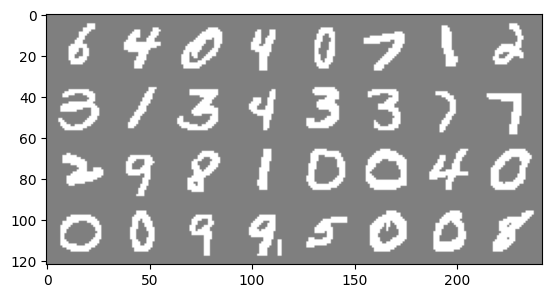

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original labels of the Images Displayed: tensor([6, 4, 0, 4, 0, 7, 1, 2, 3, 1, 3, 4, 3, 3, 7, 7, 2, 9, 8, 1, 0, 0, 4, 0,
        0, 0, 9, 9, 5, 0, 0, 8])


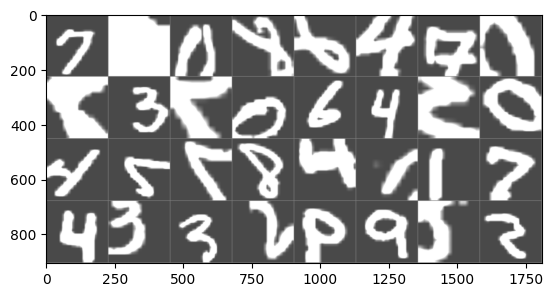

Original labels of the Images Displayed: tensor([7, 3, 0, 8, 2, 4, 7, 0, 8, 3, 9, 0, 6, 4, 3, 0, 4, 7, 7, 8, 4, 7, 1, 7,
        4, 3, 3, 5, 9, 9, 8, 5])


In [58]:
dataset = datasets.MNIST(root="/archive", download=False, train=True, transform=transform2)

train_dataset =DataLoader(dataset, batch_size=32, shuffle=True)
test_data = datasets.MNIST(root="/archive", download=False, train=False, transform=transform2)

test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

print("Matrix for a random image sample in the dataset showing the pixel range after normalization; Values are between (-3,3) \n", dataset[910])

#  Function to Display display some images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

# Show images of one batch from the train data set before preprocessing
for images, labels in train_datasetwithout :
    imshow(vutils.make_grid(images))
    print('Original labels of the Images Displayed:', labels)
    break  # Only display one batch for simplicity

# Show images of one batch from the train data set after preprocessing
for transformed_images, label in train_dataset:
    imshow(vutils.make_grid(transformed_images))
    print('Original labels of the Images Displayed:', label)
    break  # Only display one batch for simplicity

Splitting Data

In [59]:
#Specifying features and targets
x = dataset.data
y = dataset.targets
#Splitting into train set and validation set
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2)


train_data = TensorDataset(x_train,y_train)

valid_data = TensorDataset(x_valid,y_valid)


#Dataloader was used to create batch sizes -->32


PreProcessing Data

In [60]:
x_train = x_train.reshape(-1,400).float()/255.0
x_valid = x_valid.reshape(-1,400).float()/255.0
test_data.data = test_data.data.reshape(-1,400).float()/255.0
print(test_data.data.shape)
#test_loader = DataLoader(test_data, batch_size=32)



torch.Size([19600, 400])


Building Neural network Model Architecture (Class)


In [61]:
#class containing constructor and forward_prop function 
#Constructor --> defining input/hidden/output layers and the realtion between them
#Forward_prop --> defining the activation function for forward pass (relu)

class neural_net(nn.Module):
    def __init__(self):
        super(neural_net,self).__init__()
        #defining architecture

        #Fully Connected layers
        #400-->280-->150-->80-->30-->10

        # In layer --> 400 neurons
        # hidden1 --> 280 neurons
        # hidden2 --> 150 neurons
        # hidden3 --> 80 neurons
        # hidden4 --> 30 neurons
        # out layer --> 10 neurons (representing 0-->9)
        self.fc1 = nn.Linear(400,280)
        self.layernorm1 = nn.LayerNorm(280)

        self.fc2 = nn.Linear(280,150)
        self.layernorm2 = nn.LayerNorm(150)

        self.fc3 = nn.Linear(150,80)
        self.layernorm3 = nn.LayerNorm(80)

        self.fc4 = nn.Linear(80,30)
        self.layernorm4 = nn.LayerNorm(30)

        self.out = nn.Linear(30,10)



    #forward propagation function    
    def forward(self,x):
       #using ReLu Activation function
        x = F.relu(self.fc1(x))
        #Bonus: dropout layer --> for regularization
        x = self.layernorm1(x)
        x = F.dropout(x, training=self.training)

        x = F.relu(self.fc2(x))
        x = self.layernorm2(x)
        x = F.dropout(x, training=self.training)

        x = F.relu(self.fc3(x))
        x = self.layernorm3(x)
        x = F.dropout(x, training=self.training)

        x = F.relu(self.fc4(x))
        x = self.layernorm4(x)
        x = F.dropout(x, training=self.training)

        x = self.out(x)

        return F.softmax(x) #--> returns probability of each digit


#create model instance
model = neural_net()


Set Optimizer,Learning Rate,Loss Function definition

In [62]:
#Learning rate --> 0.01 (the smaller lr is the longer training time)
#Op --> SGD

optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5) #-->mbd2yan

#Loss --> Cross Entropy
loss = nn.CrossEntropyLoss()

Loaders

In [63]:
#Array to track training
train_loss_array = []
train_correct_array = []

validation_loss_array =[]
validtaion_correct_array =[]

accuracy_array=[]
accuracy2_array=[]


#Epochs Number (no. of runs on training set)
def loading(b):
    global train_loader
    train_loader= DataLoader(list(zip(x_train,y_train)),shuffle=True, batch_size=b)
    global valid_loader 
    valid_loader= DataLoader(list(zip(x_valid,y_valid)),shuffle=False, batch_size=b)
 
#If the loss doesn't decrease in output --> smaller learning rate


Training Function

In [64]:
train_acc =[]
val_acc=[]

def train(model, train_data, val_data, epochs, learning_rate,b_size):
    train_acc.clear()
    val_acc.clear()

    #Learning rate --> 0.01 (the smaller lr is the longer training time)
    #Op --> SGD
    optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.5)

    #Loss --> Cross Entropy
    loss = nn.CrossEntropyLoss()

    for epoch_num in range(epochs):

        total_acc_train = 0.0
        total_loss_train = 0.0
        for train_input, train_label in train_loader:

            output = model(train_input)
            batch_loss = loss(output, train_label)
            total_loss_train += batch_loss.item()
            if (output.argmax(dim=1) == train_label).sum().item():
                    total_acc_train += 1  # Check if the number of correct predictions is equal to the number of labels
            model.zero_grad()
            batch_loss.backward()
            optimizer.step()

        total_acc_val = 0.0
        total_loss_val = 0.0
        with torch.no_grad():

            for val_input, val_label in valid_loader:

                output = model(val_input)
                batch_loss = loss(output, val_label)
                total_loss_val += batch_loss.item()

                # acc = (output.argmax(dim=1) == val_label).sum().item()
                # total_acc_val += acc
                if (output.argmax(dim=1) == val_label).sum().item():
                    total_acc_val += 1  # Check if the number of correct predictions is equal to the number of labels
        
        train_acc.append((total_acc_train / len(train_data)))
        val_acc.append((total_acc_val / len(val_data)))
        valid_loss = total_loss_val/len(val_data)

    print(
        f'E:{epoch_num+1} |Learning Rate: {learning_rate} |Batch size:{b_size} | Train Loss: {total_loss_train / len(train_data): .3f} \
        | Train Accuracy: {(total_acc_train / len(train_data))*100: .3f} \
        | Val Loss: {total_loss_val / len(val_data): .3f} \
        | Val Accuracy: {(total_acc_val / len(val_data))*100: .3f}')
    
    



In [65]:
# #old training function (commented)
# def training(epoch,b,learn):
#     model.train()
#     correct = 0
#     total = 0
#     for x_batch ,y_batch in train_loader:
#         optimizer.zero_grad()
#         y_pred = model(x_batch)
#         trainingloss = loss(y_pred,y_batch)
#         # train_loss_array.append(trainingloss.item())
#         tt+=trainingloss.item()
#         trainingloss.backward()
#         optimizer.step()

#         _, predicted = torch.max(y_pred.data, 1)
#         total += y_batch.size(0)
#         correct += (predicted == y_batch).sum().item()
#     train_loss_array.append(tt/len(train_loader))
#     #calculating accuracy 
#     #with torch.no_grad():
#     # for x_batch, y_batch in train_loader:
#     #     outputs = model(x_batch)
#     #     _, predicted = torch.max(outputs.data, 1)
#     #     total += y_batch.size(0)
#     #     correct += (predicted == y_batch).sum().item()

#     accuracy = correct / total
#         #accuracy = correct / len(y_batch)
#     accuracy_array.append(accuracy)
#     # print('Epoch: {}: Batch: {},Learning rate: {}, Training Loss: {}, Training Accuracy: {}%'.format(epoch + 1, b,learn, np.mean(train_loss_array),accuracy*100))


   

Validation function

In [66]:
# #Old validation function(commented)
# valid_array =[]
# def validating(b,learn):
#     correct = 0
#     total = 0
#     model.eval()
#     # for i,(x_batch, y_batch) in enumerate(valid_loader,0):
#     #     y_pred = model(x_batch)
#     #     validloss = loss(y_pred,y_batch)
#     #     validation_loss_array.append(validloss.item())

#         # validloss.backward()
#     #Calculating accuracy
#     with torch.no_grad():

#         for x_batch, y_batch in valid_loader:
#             y_pred = model(x_batch)
#             validloss = loss(y_pred,y_batch)
#             vv += validloss.item()

#             # validation_loss_array.append(validloss.item())
#             _, predicted = torch.max(y_pred.data, 1)
#             total += y_batch.size(0)
#             correct += (predicted == y_batch).sum().item()
        
#         validation_loss_array.append(vv/len(valid_loader))
 
#         accuracy2 = correct / total
#         accuracy2_array.append(accuracy2)
#     print('          Batch: {},Learning Rate: {}, Validation Loss: {}, Validation Accuracy: {}%'.format(b,learn,np.mean(validation_loss_array) ,accuracy2*100))
#     print('-------------------------------------------')


Training the model and evaluating 

In [67]:
# batch_sizes = [32, 64, 128, 256, 512]
# learns = [0.01,0.001,0.0001,0.00001,0.000001]

batch_sizes = [32, 512]
learns = [0.01,0.00001]


for batch_size in batch_sizes:
    loading(batch_size)
    for learn in learns:
        # learning_rate(learn)
    #     for epoch in range(5):
    #         training(epoch,batch_size,learn)
    #         validating(batch_size,learn)
        train(model, train_loader, valid_loader, 5, learn,batch_size)


C:\Users\rahma\AppData\Local\Temp\ipykernel_14764\2640074387.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x) #--> returns probability of each digit


E:5 |Learning Rate: 0.01 |Batch size:32 | Train Loss:  2.303         | Train Accuracy:  97.467         | Val Loss:  2.302         | Val Accuracy:  98.133
E:5 |Learning Rate: 1e-05 |Batch size:32 | Train Loss:  2.302         | Train Accuracy:  97.000         | Val Loss:  2.303         | Val Accuracy:  97.333
E:5 |Learning Rate: 0.01 |Batch size:512 | Train Loss:  2.302         | Train Accuracy:  100.000         | Val Loss:  2.302         | Val Accuracy:  100.000
E:5 |Learning Rate: 1e-05 |Batch size:512 | Train Loss:  2.302         | Train Accuracy:  100.000         | Val Loss:  2.302         | Val Accuracy:  100.000


Plotting Training and validation loss and accuracy

[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]


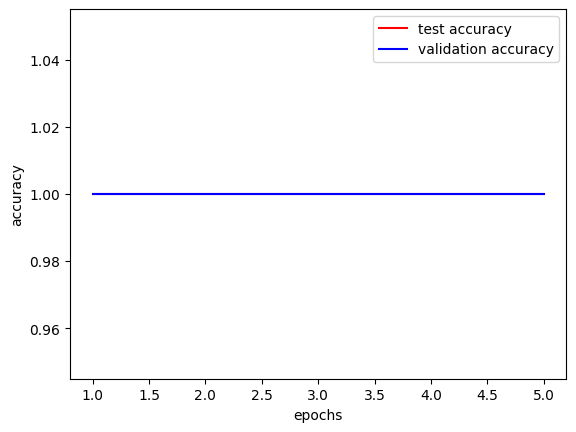

In [68]:
# plt.plot(validation_loss_array)
# plt.plot(train_loss_array)
# plt.title('Model Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend(['train', 'valid'])
# plt.show()

epochs = range(1,6)
plt.xlabel("epochs")
plt.ylabel("accuracy")
print(val_acc)
print(train_acc)
plt.plot(epochs,train_acc,color="red")
plt.plot(epochs, val_acc,color="blue")

plt.legend(["test accuracy", "validation accuracy"])

In [69]:
#old plot (commented)
# plt.plot(accuracy2_array)
# plt.plot(accuracy_array)
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epochs')
# plt.legend(['train', 'valid'])
# plt.show()

Test function 

In [70]:
def test(model,test_loader):
    model.eval()
    correct = 0
    total = 0
    test_loss =0
    # optimizer.zero_grad() 
    
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            y_pred = model(x_batch)
            # testloss = loss(y_pred, y_batch)
            # test_loss += testloss.item()
            _, predicted = torch.max(y_pred, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    # test_loss /= len(test_loader)
    accuracy = correct / total

 #   test_accuracy.append(accuracy)
    # return accuracy,test_loss
    return accuracy

Testing

In [71]:
#Test And count how many was correct
# Calculate the test accuracy

#test_loader = DataLoader(test_data, batch_size=32)
batch = 64
lr = 0.001

test_loader= DataLoader(list(zip(test_data.data,test_data.targets)),shuffle=False, batch_size=batch)
optimizer = optim.SGD(model.parameters(), lr = lr, momentum = 0.5)


test_accuracy= test(model,test_loader)


# Print the test accuracy
# print('Test Loss: {:.4f}'.format(test_loss))
print('Test Accuracy: {:.2%}'.format(test_accuracy))


C:\Users\rahma\AppData\Local\Temp\ipykernel_14764\2640074387.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x) #--> returns probability of each digit


Test Accuracy: 11.13%


Saving Model